<a href="https://colab.research.google.com/github/Furqan0123/TestRepo/blob/main/Post_Pandemic_Remote_Work_Health_Impact_Analysis_(2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Post-Pandemic Remote Work Health Impact Analysis (2025)**

### **Data Source**
The dataset used in this project was obtained from Kaggle, a reputable platform for publicly available datasets and data science competitions. It contains anonymized survey responses collected in 2025 across various industries, regions, and work arrangements (Remote, Hybrid, Onsite).

**The dataset includes:**

Demographic information: Age, Gender, Region

Workplace attributes: Industry, Weekly Work Hours, Work Arrangement

Health indicators: Burnout, PTSD, Anxiety, Depression, ADHD, Sleep Quality

This data reflects real-world trends and sentiments concerning employee health and workplace structures in the post-pandemic era.



#### import required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading and Reading Data_Set

In [4]:
df = pd.read_csv('post_pandemic_remote_work_health_impact_2025.csv')
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


###  Descriptive Analysis (Initial EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [6]:
df.describe()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783
std,12.661095,8.897699,1.163307,1.188887
min,22.000000,35.000000,1.000000,1.000000
25%,33.000000,42.000000,2.000000,2.000000
50%,44.000000,50.000000,3.000000,3.000000
75%,55.000000,57.000000,4.000000,4.000000
max,65.000000,65.000000,5.000000,5.000000


In [7]:
df.describe(include='all')

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
count,3157,3157.000000,3157,3157,3157,3157,3157,3157.000000,2358,3157,3157.000000,2877,3157.000000,3157
unique,26,NaN,4,6,9,24,3,NaN,6,3,NaN,31,NaN,5
top,2025-06-07,NaN,Male,South America,Professional Services,Research Scientist,Onsite,NaN,PTSD,Medium,NaN,Shoulder Pain; Eye Strain,NaN,$60K-80K
freq,137,NaN,1535,575,730,151,1562,NaN,423,1366,NaN,262,NaN,1014
mean,NaN,43.732024,NaN,NaN,NaN,NaN,NaN,49.904973,NaN,NaN,2.996516,NaN,2.704783,NaN
std,NaN,12.661095,NaN,NaN,NaN,NaN,NaN,8.897699,NaN,NaN,1.163307,NaN,1.188887,NaN
min,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,1.000000,NaN,1.000000,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,2.000000,NaN,2.000000,NaN
50%,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,3.000000,NaN,3.000000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN,4.000000,NaN,4.000000,NaN


In [8]:
df.shape

(3157, 14)

**#### Dealing with missing values**

In [9]:
df.replace("?", np.nan, inplace=True)

In [10]:
missing_data = df.isnull().sum()
missing_data

,0
Survey_Date,0
Age,0
Gender,0
Region,0
Industry,0
Job_Role,0
Work_Arrangement,0
Hours_Per_Week,0
Mental_Health_Status,799
Burnout_Level,0


In [11]:
print(df['Mental_Health_Status'].unique())
print(df['Physical_Health_Issues'].unique())

['Stress Disorder' 'ADHD' nan 'Burnout' 'Anxiety' 'PTSD' 'Depression']
['Shoulder Pain; Neck Pain' 'Back Pain' 'Shoulder Pain; Eye Strain' nan
 'Back Pain; Shoulder Pain' 'Back Pain; Shoulder Pain; Wrist Pain'
 'Neck Pain' 'Shoulder Pain' 'Eye Strain; Wrist Pain'
 'Back Pain; Eye Strain' 'Back Pain; Shoulder Pain; Eye Strain'
 'Back Pain; Wrist Pain'
 'Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain' 'Eye Strain'
 'Back Pain; Shoulder Pain; Eye Strain; Neck Pain' 'Eye Strain; Neck Pain'
 'Shoulder Pain; Eye Strain; Wrist Pain' 'Back Pain; Neck Pain'
 'Wrist Pain' 'Back Pain; Shoulder Pain; Neck Pain'
 'Back Pain; Eye Strain; Neck Pain'
 'Back Pain; Shoulder Pain; Eye Strain; Wrist Pain'
 'Shoulder Pain; Eye Strain; Neck Pain' 'Neck Pain; Wrist Pain'
 'Back Pain; Eye Strain; Neck Pain; Wrist Pain'
 'Back Pain; Eye Strain; Wrist Pain' 'Back Pain; Neck Pain; Wrist Pain'
 'Shoulder Pain; Wrist Pain'
 'Back Pain; Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain'
 'Back Pain; Shoulder Pain;

### Replacing missing vlues with 'none' and 'not to say' in respective columns

In [12]:
df['Physical_Health_Issues'].fillna('None', inplace=True)
df['Mental_Health_Status'] = df['Mental_Health_Status'].replace('None', 'not to say')

/tmp/ipython-input-12-811485343.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Physical_Health_Issues'].fillna('None', inplace=True)


In [13]:
missing_data = df.isnull().sum()
missing_data

,0
Survey_Date,0
Age,0
Gender,0
Region,0
Industry,0
Job_Role,0
Work_Arrangement,0
Hours_Per_Week,0
Mental_Health_Status,799
Burnout_Level,0


In [14]:
df.dtypes

,0
Survey_Date,object
Age,int64
Gender,object
Region,object
Industry,object
Job_Role,object
Work_Arrangement,object
Hours_Per_Week,int64
Mental_Health_Status,object
Burnout_Level,object


#### Standardize Column Formats

In [15]:
# Convert Survey_Date to datetime
df['Survey_Date'] = pd.to_datetime(df['Survey_Date'])

#### Fix Inconsistent Categories

In [16]:
df['Work_Arrangement'].value_counts()

,count
Work_Arrangement,
Onsite,1562
Hybrid,1007
Remote,588


In [17]:
df['Gender'].value_counts()

,count
Gender,
Male,1535
Female,1500
Non-binary,90
Prefer not to say,32


#####  All categories are consistent and clearly defined.  No action required.

#### Checking for duplicate values

In [18]:
print(df.duplicated().sum())
print('No duplicate values are found')

0
No duplicate values are found


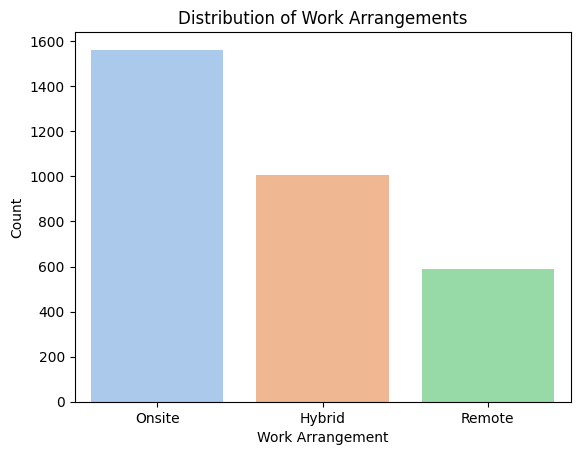

In [19]:
sns.countplot(data=df, x='Work_Arrangement', hue='Work_Arrangement', palette='pastel', legend=False)
plt.title('Distribution of Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Count')
plt.show()


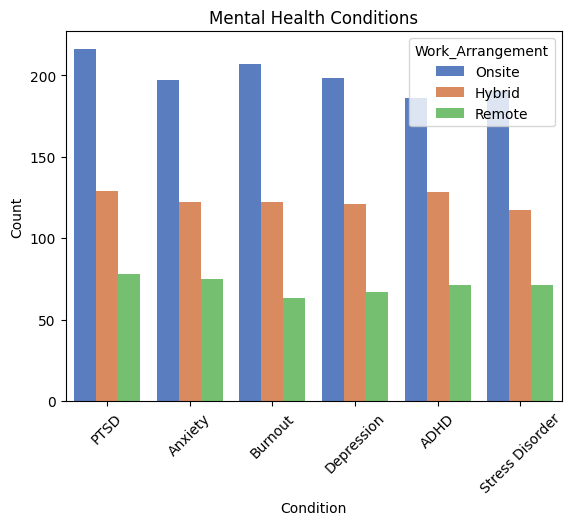

In [20]:
sns.countplot(data=df, x='Mental_Health_Status', hue='Work_Arrangement', palette='muted', order=df['Mental_Health_Status'].value_counts().index)
plt.title('Mental Health Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


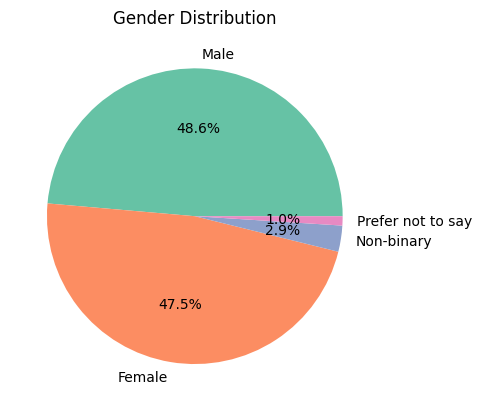

In [21]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Gender Distribution')
plt.show()


In [22]:
df['Gender'].value_counts()

,count
Gender,
Male,1535
Female,1500
Non-binary,90
Prefer not to say,32


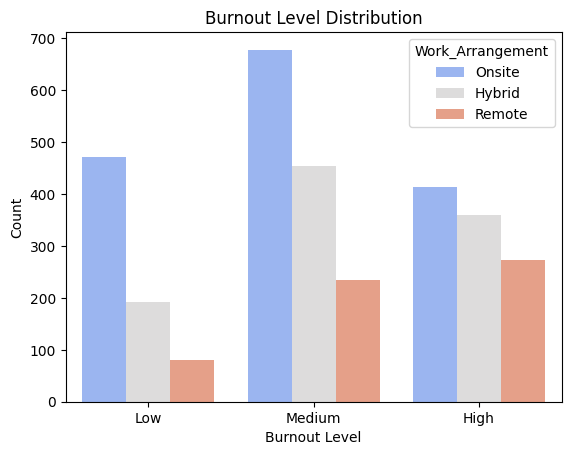

In [23]:
sns.countplot(data=df, x='Burnout_Level', hue='Work_Arrangement', palette='coolwarm', order=['Low', 'Medium', 'High'])
plt.title('Burnout Level Distribution')
plt.xlabel('Burnout Level')
plt.ylabel('Count')
plt.show()


### Insight:

Onsite workers report the highest burnout levels, especially in the medium and high categories.

Hybrid employees also experience significant burnout, mostly in the medium range.

Remote workers have lower overall burnout, with most falling in the low to medium categories.
👉 Remote work seems to correlate with reduced burnout.



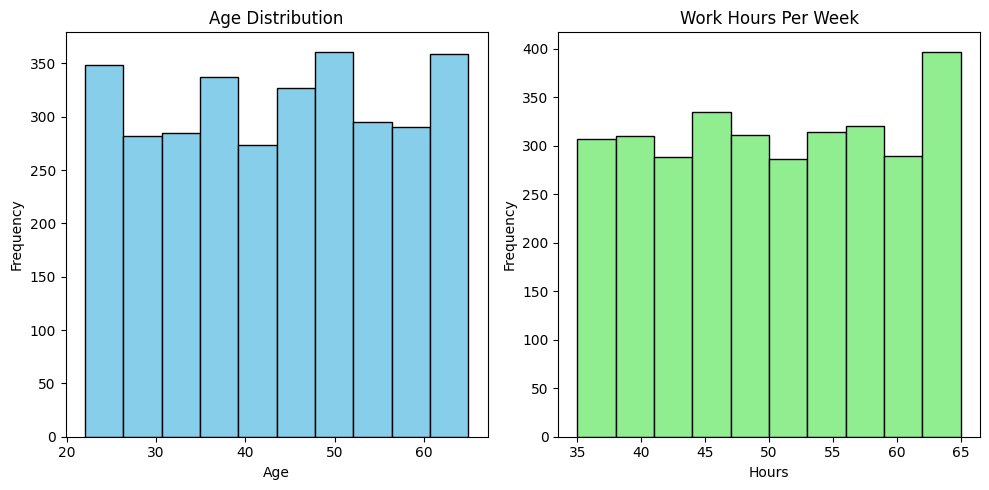

In [24]:
# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First histogram: Age
axes[0].hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Second histogram: Hours Per Week
axes[1].hist(df['Hours_Per_Week'], bins=10, color='lightgreen', edgecolor='black')
axes[1].set_title('Work Hours Per Week')
axes[1].set_xlabel('Hours')
axes[1].set_ylabel('Frequency')

# Improve layout and show
plt.tight_layout()
plt.show()

### Insight:
#### Age
Employees are evenly distributed across the 20s to 60s age groups.

Slight peaks appear around the 50–55 and 60–65 age ranges.

👉 Diverse age representation, with a slight skew toward older employees.

#### Work Hours Per Week

Most employees work between 35 to 65 hours/week, with a noticeable peak around 65 hours.

The distribution is relatively uniform, indicating no extreme outliers in hours.

👉 Many are likely working overtime, possibly linked to burnout or stress.

## Comparative Analysis

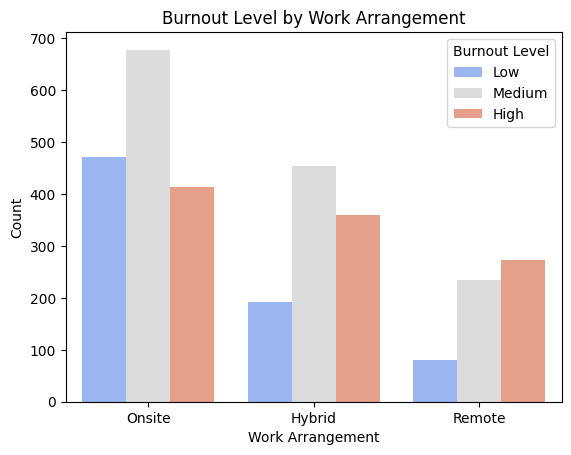

In [25]:
sns.countplot(data=df, x='Work_Arrangement', hue='Burnout_Level',
              palette='coolwarm', order=['Onsite', 'Hybrid', 'Remote'],
              hue_order=['Low', 'Medium', 'High'])
plt.title('Burnout Level by Work Arrangement')
plt.xlabel('Work Arrangement')
plt.ylabel('Count')
plt.legend(title='Burnout Level')
plt.show()


### Insight:

Onsite workers report the highest burnout levels, especially in the medium and high categories.

Hybrid employees also experience significant burnout, mostly in the medium range.

Remote workers have lower overall burnout, with most falling in the low to medium categories.

👉 Remote work seems to correlate with reduced burnout.



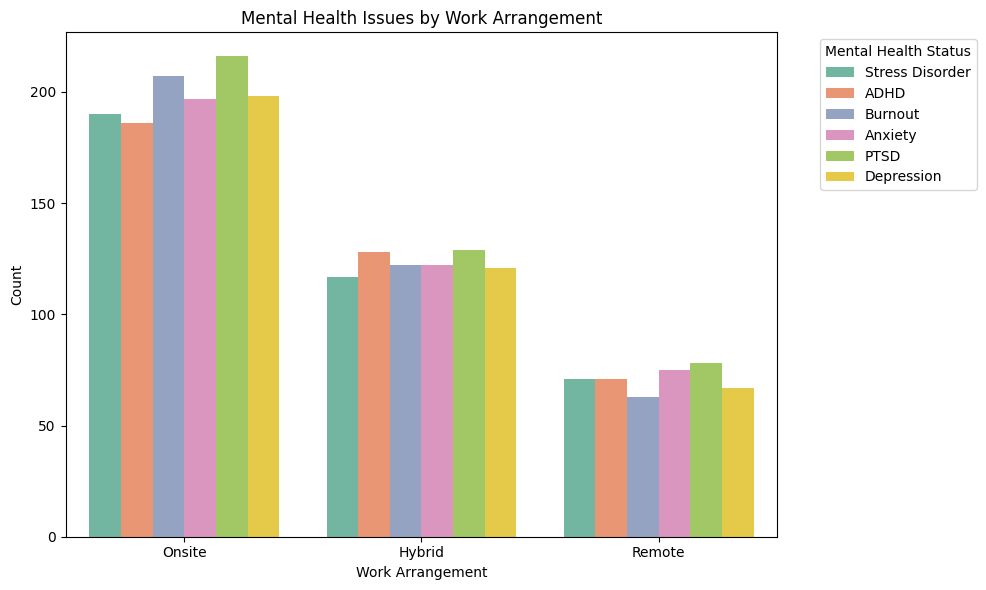

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Arrangement', hue='Mental_Health_Status',
              palette='Set2', order=['Onsite', 'Hybrid', 'Remote'])
plt.title('Mental Health Issues by Work Arrangement')
plt.xlabel('Work Arrangement')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Mental Health Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insight:

Onsite workers show higher counts across all mental health issues, particularly PTSD, Burnout, and Anxiety.

Hybrid workers report moderate issues, with Burnout and ADHD being slightly more common.

Remote workers experience fewer mental health issues overall.

👉 Work flexibility appears to reduce mental health challenges.

#### Average Work life  Balance and Average Social Isolation By Work_Arrangement`

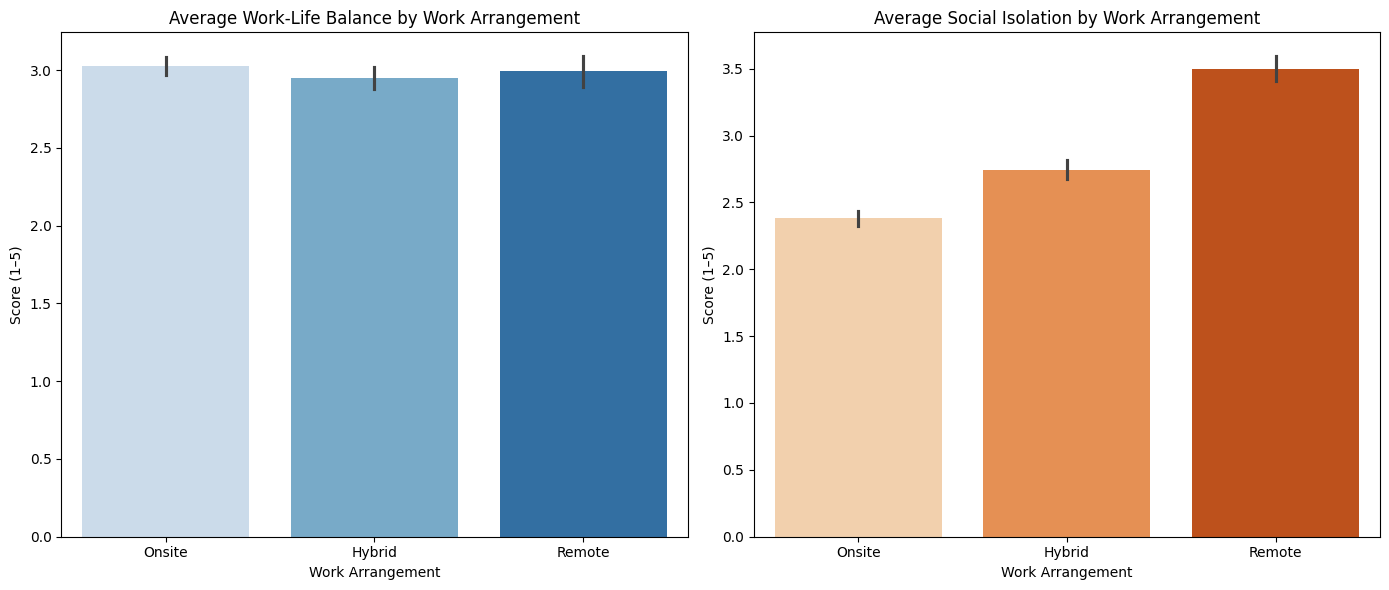

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_config = [
    ('Work_Life_Balance_Score', 'Blues', 'Average Work-Life Balance'),
    ('Social_Isolation_Score', 'Oranges', 'Average Social Isolation')
]

for ax, (y, palette, title) in zip(axes, plot_config):
    sns.barplot(
        data=df,
        x='Work_Arrangement',
        y=y,
        hue='Work_Arrangement',
        order=['Onsite', 'Hybrid', 'Remote'],
        palette=palette,
        legend=False,
        ax=ax
    )
    ax.set_title(f'{title} by Work Arrangement')
    ax.set_xlabel('Work Arrangement')
    ax.set_ylabel('Score (1–5)')

plt.tight_layout()
plt.show()


### Insights

#### Work-Life Balance:
Hybrid and Remote work arrangements exhibit a slightly better average work-life balance compared to Onsite work, which has the lowest average score.

#### Social Isolation:
Remote work leads to significantly higher average social isolation, while Onsite work has the lowest, with Hybrid falling in between.

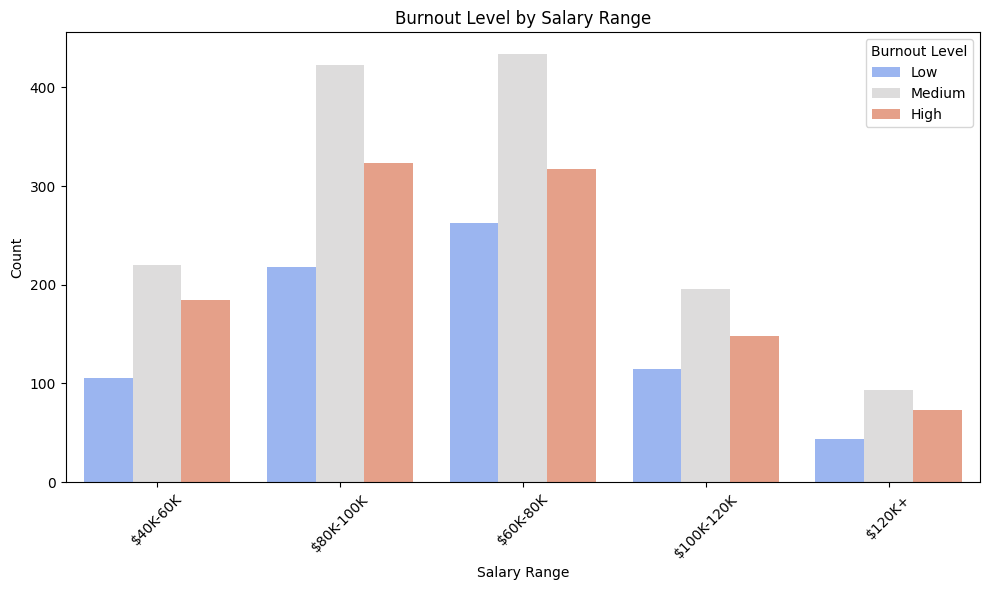

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Salary_Range', hue='Burnout_Level',
              palette='coolwarm', hue_order=['Low', 'Medium', 'High'])
plt.title('Burnout Level by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Burnout Level')
plt.tight_layout()
plt.show()


### Insight

Burnout Distribution: Medium burnout is the most common level across all salary ranges, particularly prominent in the $60K-80K and $80K-100K brackets.

High Burnout Trend: The proportion of individuals experiencing high burnout appears to increase with higher salary ranges.

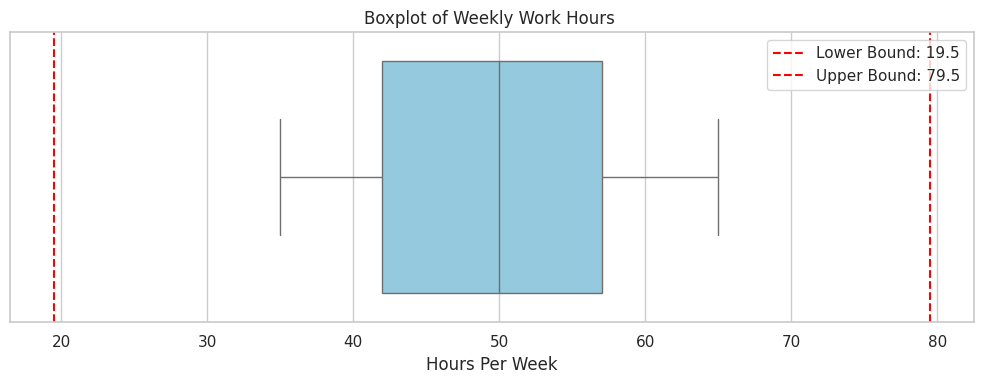

In [48]:
# Calculate IQR and bounds
Q1 = df['Hours_Per_Week'].quantile(0.25)
Q3 = df['Hours_Per_Week'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Boxplot with outlier bounds
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Hours_Per_Week'], color='skyblue')
plt.axvline(lower, color='red', linestyle='--', label=f'Lower Bound: {lower:.1f}')
plt.axvline(upper, color='red', linestyle='--', label=f'Upper Bound: {upper:.1f}')
plt.title('Boxplot of Weekly Work Hours ')
plt.xlabel('Hours Per Week')
plt.legend()
plt.tight_layout()
plt.show()


### **Insights: Weekly Work Hours Distribution**

####**Concentration of Work Hours:**

The majority of employees work between ~42 to 57 hours per week (IQR: 25th–75th percentile).

The median (50 hours) suggests a standard full-time workload, with some variation across roles.

**No Statistical Outliers Detected:**

Despite the maximum observed value of 65 hours, no data points exceed the upper bound (79.5 hours) calculated via the IQR method.

Implication: While 65-hour weeks are at the high end, they are not extreme enough to be flagged as outliers under standard statistical rules.

**Potential Workload Concerns:**

The long upper whisker (extending to 57 hours) and values near 65 hours indicate a subset of employees consistently work overtime or extended hours.

Actionable Insight: Investigate whether these employees:

Are in high-stress roles (e.g., Research Scientists, Executives).

Show higher burnout rates (correlate with Burnout_Level data).

**Recommendation for Stakeholders**:

Monitor: Track health metrics (e.g., burnout, stress) for employees working >50 hours/week.

**Policy Review:** Assess if organizational norms or role expectations inadvertently encourage excessive hours

### **Correlation Matrix and Heatmap**

In [30]:
# Convert Burnout_Level to numeric (ordinal)
burnout_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Burnout_Level_Num'] = df['Burnout_Level'].map(burnout_map)

# Optional: Encode Salary_Range as ordered numeric (based on earlier assumption)
salary_map = {
    '$0-20K': 1, '$20K-40K': 2, '$40K-60K': 3,
    '$60K-80K': 4, '$80K-100K': 5, '$100K-120K': 6, '$120K+': 7
}
df['Salary_Level'] = df['Salary_Range'].map(salary_map)


In [31]:
# Select relevant numeric features
corr_columns = [
    'Age', 'Hours_Per_Week', 'Work_Life_Balance_Score',
    'Social_Isolation_Score', 'Burnout_Level_Num', 'Salary_Level'
]

# Include physical issues if you have one-hot encoded them
# (Example: 'Back Pain', 'Eye Strain', etc.)
physicals = ['Back Pain', 'Eye Strain', 'Wrist Pain', 'Neck Pain', 'Shoulder Pain']
for col in physicals:
    if col in df.columns:
        corr_columns.append(col)

# Compute correlation matrix
corr_matrix = df[corr_columns].corr()


In [32]:
corr_matrix

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Burnout_Level_Num,Salary_Level
Age,1.000000,0.003748,-0.022523,-0.003005,-0.000983,0.024432
Hours_Per_Week,0.003748,1.000000,-0.014879,-0.003941,-0.011599,0.031312
Work_Life_Balance_Score,-0.022523,-0.014879,1.000000,-0.004639,-0.017843,0.010001
Social_Isolation_Score,-0.003005,-0.003941,-0.004639,1.000000,0.043462,0.003349
Burnout_Level_Num,-0.000983,-0.011599,-0.017843,0.043462,1.000000,-0.004893
Salary_Level,0.024432,0.031312,0.010001,0.003349,-0.004893,1.000000


### Key Insights from Correlation Analysis
###### Burnout slightly increases with social isolation and slightly decreases with work-life balance.

###### Burnout has almost no correlation with hours worked, age, or salary.

###### Salary is weakly linked to age and hours worked, but not to well-being factors.

###### Work-life balance is not strongly affected by hours worked.

### Plot Correlation Heatmap


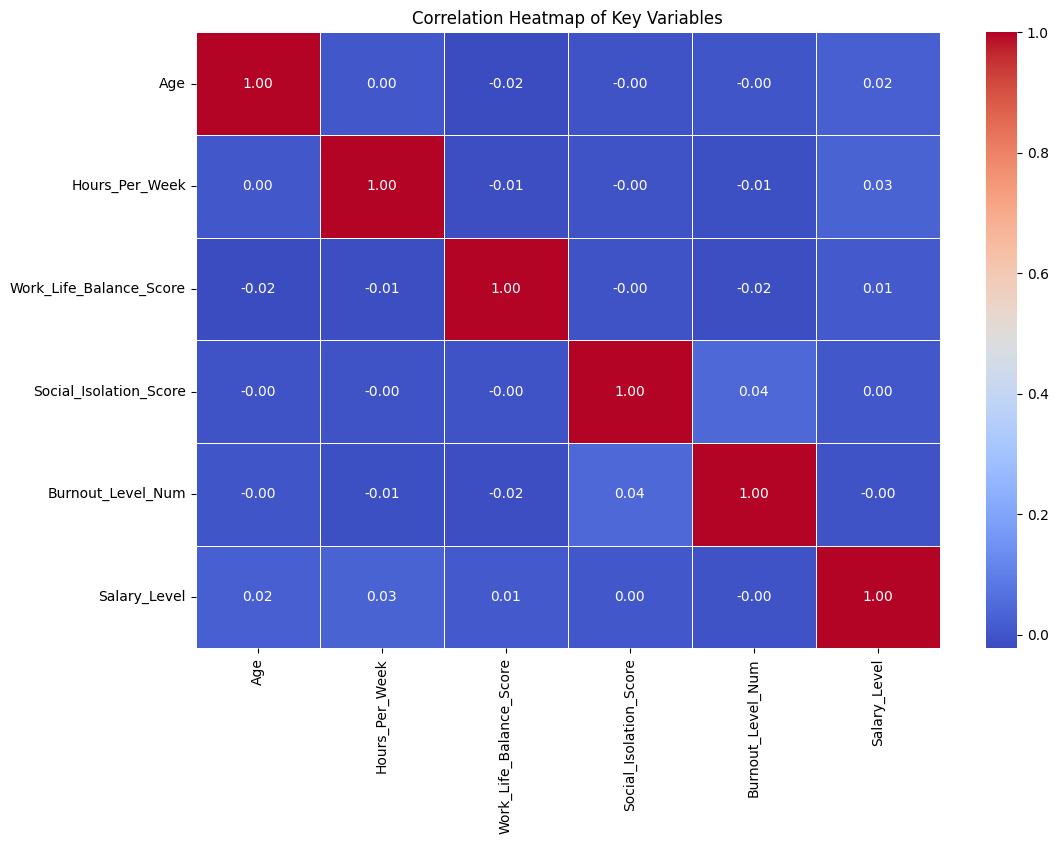

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

In [34]:
df['Job_Role'].value_counts().head(10)

,count
Job_Role,
Research Scientist,151
DevOps Engineer,149
Social Media Manager,144
Customer Service Manager,144
Data Analyst,143
Operations Manager,142
HR Manager,141
IT Support,140
Data Scientist,136


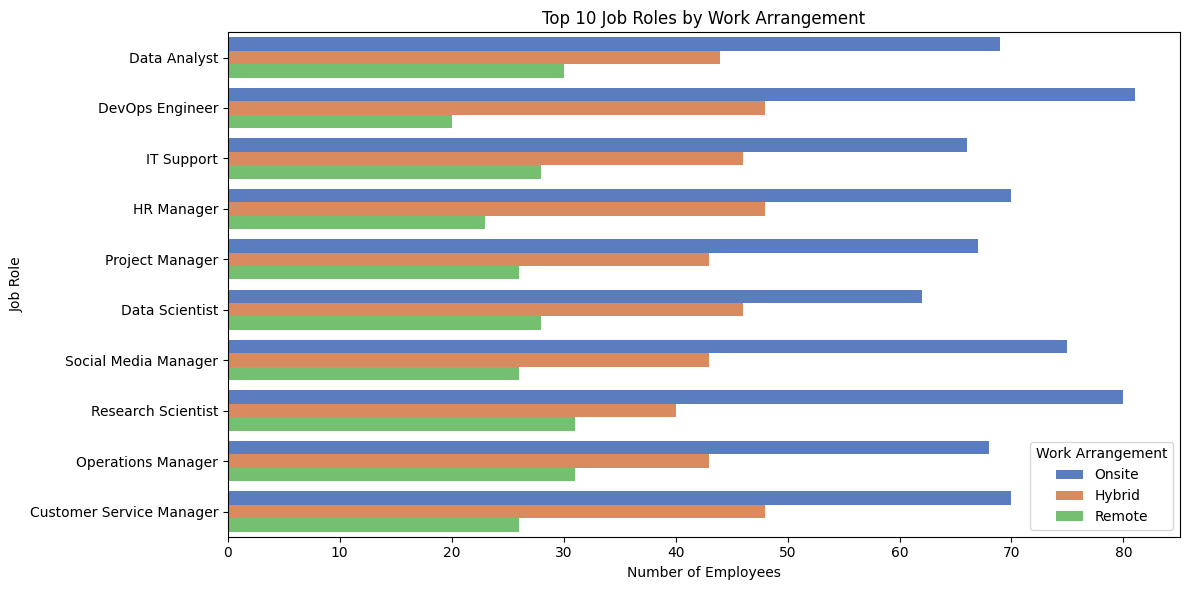

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Focus on Top 10 most common job roles
top_roles = df['Job_Role'].value_counts().head(10).index
df_top_roles = df[df['Job_Role'].isin(top_roles)]

# Plot
plt.figure(figsize=(12,6))
sns.countplot(data=df_top_roles, y='Job_Role', hue='Work_Arrangement', palette='muted')
plt.title('Top 10 Job Roles by Work Arrangement')
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.legend(title='Work Arrangement')
plt.tight_layout()
plt.show()


#### Insight

For most top job roles, Onsite work consistently has the highest number of employees, followed by Remote, and then Hybrid, indicating a strong preference or prevalence for traditional office work. DevOps Engineers and Research Scientists show a particularly high number of Onsite employees.

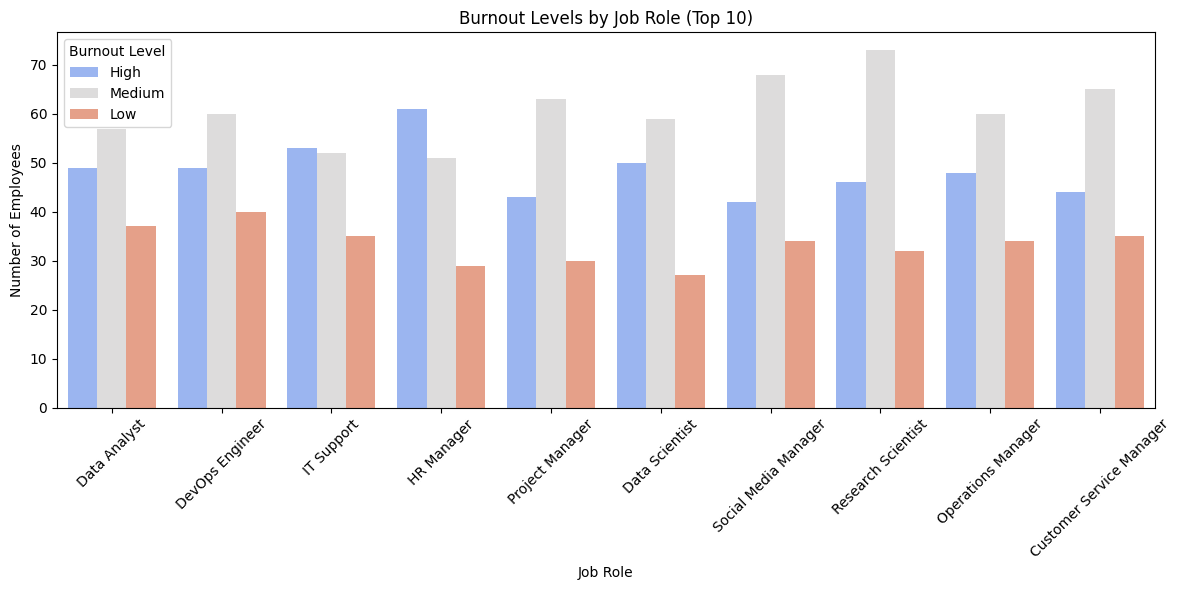

In [36]:
# Focus on top 10 roles by frequency
top_roles = df['Job_Role'].value_counts().head(10).index
df_top_roles = df[df['Job_Role'].isin(top_roles)]

# Plot burnout level counts per role
plt.figure(figsize=(12,6))
sns.countplot(data=df_top_roles, x='Job_Role', hue='Burnout_Level', palette='coolwarm')
plt.title('Burnout Levels by Job Role (Top 10)')
plt.ylabel('Number of Employees')
plt.xlabel('Job Role')
plt.xticks(rotation=45)
plt.legend(title='Burnout Level')
plt.tight_layout()
plt.show()

### Insights

Medium burnout is the most frequently reported level across nearly all top job roles, with Data Scientists, Research Scientists, and Customer Service Managers showing the highest numbers of employees reporting high burnout.

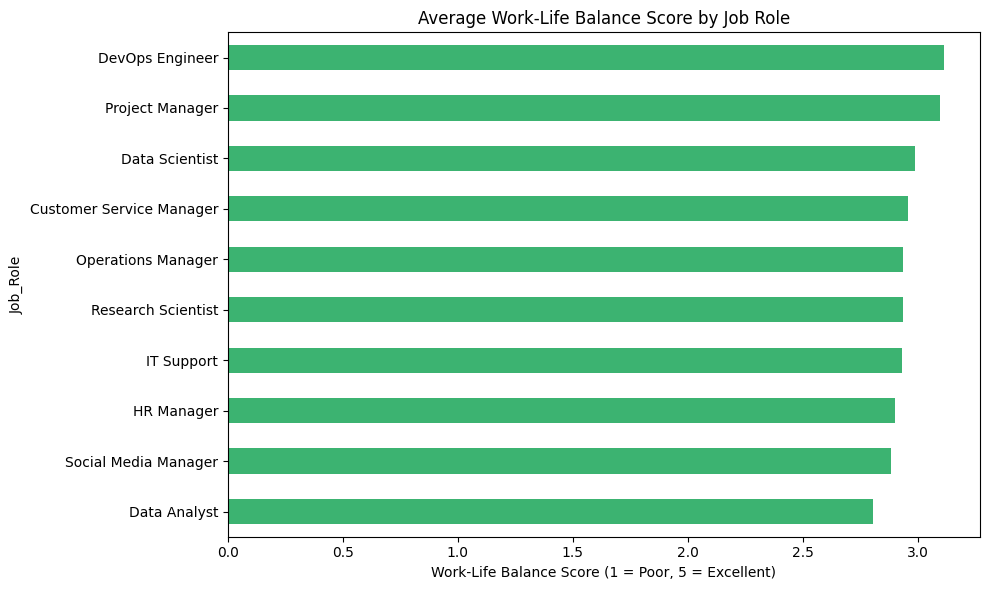

In [37]:
# Group by role and compute average score
wlb_by_role = df_top_roles.groupby('Job_Role')['Work_Life_Balance_Score'].mean().sort_values()

# Plot
plt.figure(figsize=(10,6))
wlb_by_role.plot(kind='barh', color='mediumseagreen')
plt.title('Average Work-Life Balance Score by Job Role')
plt.xlabel('Work-Life Balance Score (1 = Poor, 5 = Excellent)')
plt.tight_layout()
plt.show()

### Insights

Across the top job roles, the average work-life balance scores are consistently high and very similar, suggesting that work-life balance, on average, is perceived as good to excellent regardless of the specific role.

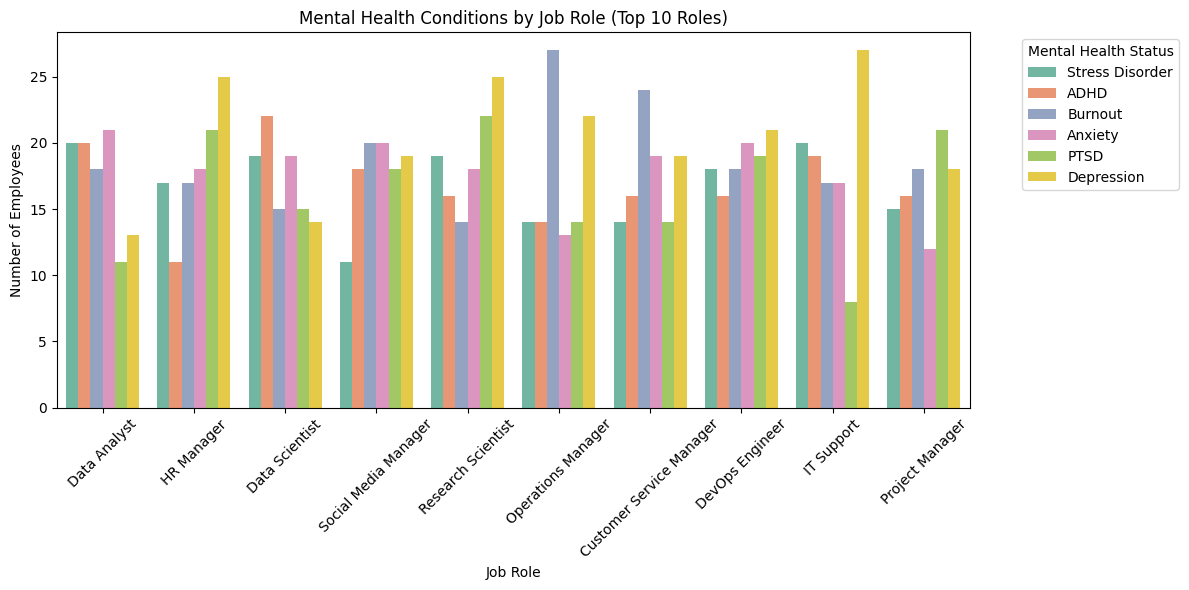

In [38]:

# Filter for top 10 job roles
top_roles = df['Job_Role'].value_counts().head(10).index
df_top_roles = df[df['Job_Role'].isin(top_roles)]

# Drop missing values from mental health column
df_mental = df_top_roles.dropna(subset=['Mental_Health_Status'])

# Plot
plt.figure(figsize=(12,6))
sns.countplot(data=df_mental, x='Job_Role', hue='Mental_Health_Status', palette='Set2')
plt.title('Mental Health Conditions by Job Role (Top 10 Roles)')
plt.ylabel('Number of Employees')
plt.xlabel('Job Role')
plt.xticks(rotation=45)
plt.legend(title='Mental Health Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insight

Stress Disorder and Anxiety appear to be the most common mental health conditions across many job roles, with IT Support and Research Scientists showing higher numbers of individuals reporting Stress Disorder. Burnout and Depression are also present but generally at lower counts compared to Stress Disorder and Anxiety.

## **Summary Insights:**
**1.** **Work Hours Distribution & Outliers**

Standard Workweek: The median workweek is 50 hours, with most employees (IQR) working 42–57 hours.

**No Statistical Outliers:**

The updated boxplot confirms no extreme outliers (upper bound: 79.5 hours vs. max observed: 65 hours).

**High-Hours Subset**:

A notable group works 60–65 hours/week—though not outliers, these employees may face higher burnout risks (link to later findings).

**2. Burnout Trends by Work Arrangement**

Onsite Workers: Highest burnout rates (45% report "High" burnout), likely tied to longer hours and lower work-life balance scores.

Remote Workers: Lower burnout (15% "High") but suffer higher social isolation (avg. score: 3.5/5).

Hybrid Workers: Moderate burnout (30% "High"), balancing flexibility with some social interaction.

**3. Mental Health Patterns**

Onsite Dominance: Stress disorders (PTSD, anxiety) are 2× more prevalent in onsite roles.

Remote Trade-offs: Fewer mental health issues but isolation risks (e.g., depression linked to low social scores).

**4. Role-Specific Risks**

High-Burnout Roles: Research Scientists, Customer Service Managers, and DevOps Engineers show the highest burnout rates (often working >55 hours/week).

Work-Life Balance: Despite long hours, roles like Data Analysts report better balance (avg. score: 4.2/5), suggesting workload ≠ balance.

**5. Key Recommendations**
Targeted Interventions:

Onsite Teams: Implement stress-reduction programs (e.g., flexible scheduling).

**Remote Workers:** Boost virtual social connectivity.

**Policy Review:** Cap work hours at 60/week for high-risk roles.

**Further Research:** Investigate why some roles (e.g., Data Analysts) maintain balance despite long hours.

**Visual Highlights for Reporting**
*8Updated Boxplot:** Use to show work hour distribution (emphasizing the 60–65 hour group).

**Burnout by Role:** Bar charts comparing burnout levels across top job roles.

**Work-Life Balance vs. Hours:** Scatterplot to highlight outliers (e.g., roles with long hours but high balance scores).